In [1]:
import pandas as pd
import numpy as np
from geopy import geocoders
import folium

### Doing some entitiy recognition on the first article of the first newspaper in the first df, using spacy: 

In [2]:
# import spacy
# ! python -m spacy download de_core_news_sm

# nlp = spacy.load("de_core_news_sm")
# doc = nlp(df.iloc[0,13])

# for ent in doc.ents: 
#     """
#     Getting the names of all locations within the loaded newspaper article:
#     """
#     if ent.label_== 'LOC':
#         print(ent.text)

Let's see whether "Widdig" from the above list is really a location:

In [3]:
# import wikipedia as wiki
# wiki.set_lang("de")

# search_string = 'Widdig'
# page = wiki.page(search_string)
# content = page.content
# content[0:680]

### loading pickled dataframes, making new dataframes out of them and saving them to the local drive:

In [32]:
# def pickled_df_loader (year, columns):
#     """
#     loads dataframes from the pickled dfs. 
#     """
#     df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_1")[columns]
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_2")[columns]]\
#                    , axis=0)
#     df= pd.concat ([df, pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_{year}_part_3")[columns]]\
#                    , axis=0)
    
#     df['publication_date']= df['publication_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
#     df['publication_date'] = pd.to_datetime(df['publication_date'], format='%Y-%m-%d')
    
#     return df

In [33]:
# def challenge_df_generator (begin, end):
#     """
#     loads all pickled dataframes belonging to the years in the year range and returns their concatenation as a single df. 
#     """ 
    
#     columns= ['paper_title', 'publication_date', 'place_of_distribution']
    
#     df= pickled_df_loader (begin, columns)
    
#     for year in range (begin+1, end+1):
#         df= pd.concat([df, pickled_df_loader(year, columns)], axis=0)
        
#     return df

In [38]:
# df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_ger_1915_part_1")
# df.head(20)

### Analyzing the dataframe containing all the data between 1914 and 1945:

In [7]:
# newspapers_1914_1945_df= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/newspapers_no_article_14_45")

In [8]:
#newspapers_1914_1945_df.head()

In [9]:
#newspapers_1914_1945_df.tail()

In [10]:
#newspapers_1914_1945_df.info()

#### Let's see what we can do with the lists of the cities: 

Extracting all places of distribution and storing them in a pickled python list:

In [11]:
# unique_cities=[]
# for city in newspapers_1914_1945_df['place_of_distribution']:
#     if city not in unique_cities: 
#         unique_cities.append(city)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl", "wb") as f:
#     pickle.dump(unique_cities, f)

In [12]:
# city_list= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/unique_cities.pkl")
# city_list

Extracting names of single cities from the pickled city list: 

In [13]:
# single_city_list= []

# for place in city_list:
#     if isinstance (place, list):
#         for i in range(0, len(place)):
#             if place[i] not in single_city_list:
#                 single_city_list.append(place[i])
#     else: 
#         if place not in city_list:
#             city_list.append(place)

# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl", "wb") as f:
#     pickle.dump(single_city_list, f)

In [14]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# cities_1914_1945

Pinning the cities from a city list on the world map:

In [15]:
# def map_maker(city_list):
# #plots the cities in the city list on a map.
    
#     city_dict= {}
#     gn= geocoders.GeoNames(username="golisf")
    
#     for city in city_list:
#         if not pd.isna(city):
#             city_dict[city]= gn.geocode(city)
            
#     # Create a map centered at a location, you can adjust the coordinates and zoom level as needed
#     map_center= [51.1657, 10.4515]  # Germany's approximate center
#     my_map= folium.Map(location=map_center, zoom_start=6)
 
#     # Add markers for each city
#     for city in list(city_dict.keys()):
#         folium.Marker(location=city_dict[city], popup=city).add_to(my_map)
        
#     return my_map

In [16]:
# cities_1914_1945= pd.read_pickle(f"./data_deutsches_zeitungsportal_1914_1945/single_cities.pkl")
# map_maker(cities_1914_1945)

#### Let's see what we can do with the paper titles: 

Extracting the titles of available newspapers and storing them in a pickled python list: 

In [17]:
# unique_papers=[]
# for paper in newspapers_1914_1945_df['paper_title']:
#     if paper not in unique_papers: 
#         unique_papers.append(paper)
        
# import pickle
# with open(f"./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl", "wb") as f:
#     pickle.dump(unique_papers, f)

In [18]:
# all_papers= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/unique_papers.pkl")
# all_papers

Create a df with the following columns: 

- name of newspaper
- cities of distribution
- date begin
- date end

In [19]:
# paper_publication_df = newspapers_1914_1945_df.groupby('paper_title').agg(
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Running the above code, I realized that the same newspaper sometimes appears multiple times in the title, each time with minor changes (eg. issues and numbers are added to the title). So I optimized the code as below. In the below code, the newspaper title is tokenized and the the first three tokens of the title are added to the df as a separate column. Then the newspapers are grouped by the first three tokens and the newspaper_title is replaced by the shortest of newspaper title that shares the first three tokens. 

Question: Could it be that the different versions of the same newspaper have been distributed in different cities? 

- Perhaps the cities should not play an important role in the challegens. 
- Perhaps I have to write a more sophisticated code that combines all distribution places of all the versions of a single newspaper into a longer list and adds this list to the final paper_publication_df. 

In [20]:
# # Function to extract first three tokens from a string
# def extract_tokens(title):
#     tokens = title.split()
#     return ' '.join(tokens[:3])

# # Apply the function to create a new column for the first three tokens
# newspapers_1914_1945_df['first_three_tokens'] = newspapers_1914_1945_df['paper_title'].apply(extract_tokens)

# # Group by the first three tokens and aggregate to get the shortest title
# paper_publication_df = newspapers_1914_1945_df.groupby('first_three_tokens').agg(
#     paper_title=('paper_title', lambda x: min(x, key=len)),
#     publication_begin=('publication_date', 'min'),
#     publication_end=('publication_date', 'max'),
#     place_of_distribution=('place_of_distribution', 'first')
# ).reset_index()

# # Drop the temporary column
# paper_publication_df.drop(columns='first_three_tokens', inplace=True)

# paper_publication_df.to_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")

Let's see which newspapers were published between which years:

In [21]:
paper_publication_df= pd.read_pickle("./data_deutsches_zeitungsportal_1914_1945/paper_publication_df")
paper_publication_df

,paper_title,publication_begin,publication_end,place_of_distribution
0,Aachener Anzeiger : politisches Tageblatt : be...,1914-01-01,1943-12-31,"[Aachen, Regierungsbezirk Aachen]"
1,Aachener Rundschau : politische und soziale Ta...,1916-01-04,1916-03-31,[Aachen]
2,Ahauser Kreiszeitung : amtliches Kreisblatt fü...,1933-01-01,1933-03-31,"[Ahaus, Stadtlohn, Vreden, Heek, Legden, Südlohn]"
3,Akademische Mitteilungen : amtliches Mitteilun...,1922-05-31,1930-07-15,None
4,Alb-Bote : Rundschau von der Alb : Münsinger K...,1914-01-02,1945-04-21,[Münsingen (Baden-Württemberg)]
...,...,...,...,...
775,Zurückverlangte Neuigkeiten,1914-01-31,1921-12-31,None
776,Zweites Blatt der Tremonia. 1934-1934,1934-01-02,1934-03-30,[Castrop-Rauxel]
777,Zwischen Grube und Scholle. 1932-1934,1932-07-07,1932-10-10,[Bergheim (Erft)]
778,Über die Grenzen : von Flüchtlingen für Flücht...,1944-11-30,1945-12-31,None


In [29]:
paper_publication_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   paper_title            780 non-null    object        
 1   publication_begin      780 non-null    datetime64[ns]
 2   publication_end        780 non-null    datetime64[ns]
 3   place_of_distribution  727 non-null    object        
dtypes: datetime64[ns](2), object(2)
memory usage: 24.5+ KB


Let's see how many "Fachzeitschriften" there are among the newspapers: 

In [43]:
fach_papers= [paper for paper in paper_publication_df['paper_title'] if 'fach' in paper.lower()]
paper_publication_df[paper_publication_df['paper_title'].isin(fach_papers)]

,paper_title,publication_begin,publication_end,place_of_distribution
124,Der Baumeister : Fachorgan des Badischen Baume...,1930-01-20,1935-12-20,None
517,Leipziger Monatsschrift für Textil-Industrie :...,1914-01-07,1929-12-15,[Leipzig]
520,Leipziger Wochenschrift für Textil-Industrie :...,1920-01-07,1923-09-25,[Leipzig]


Let's see for how long each newspaper has been published after 1914:

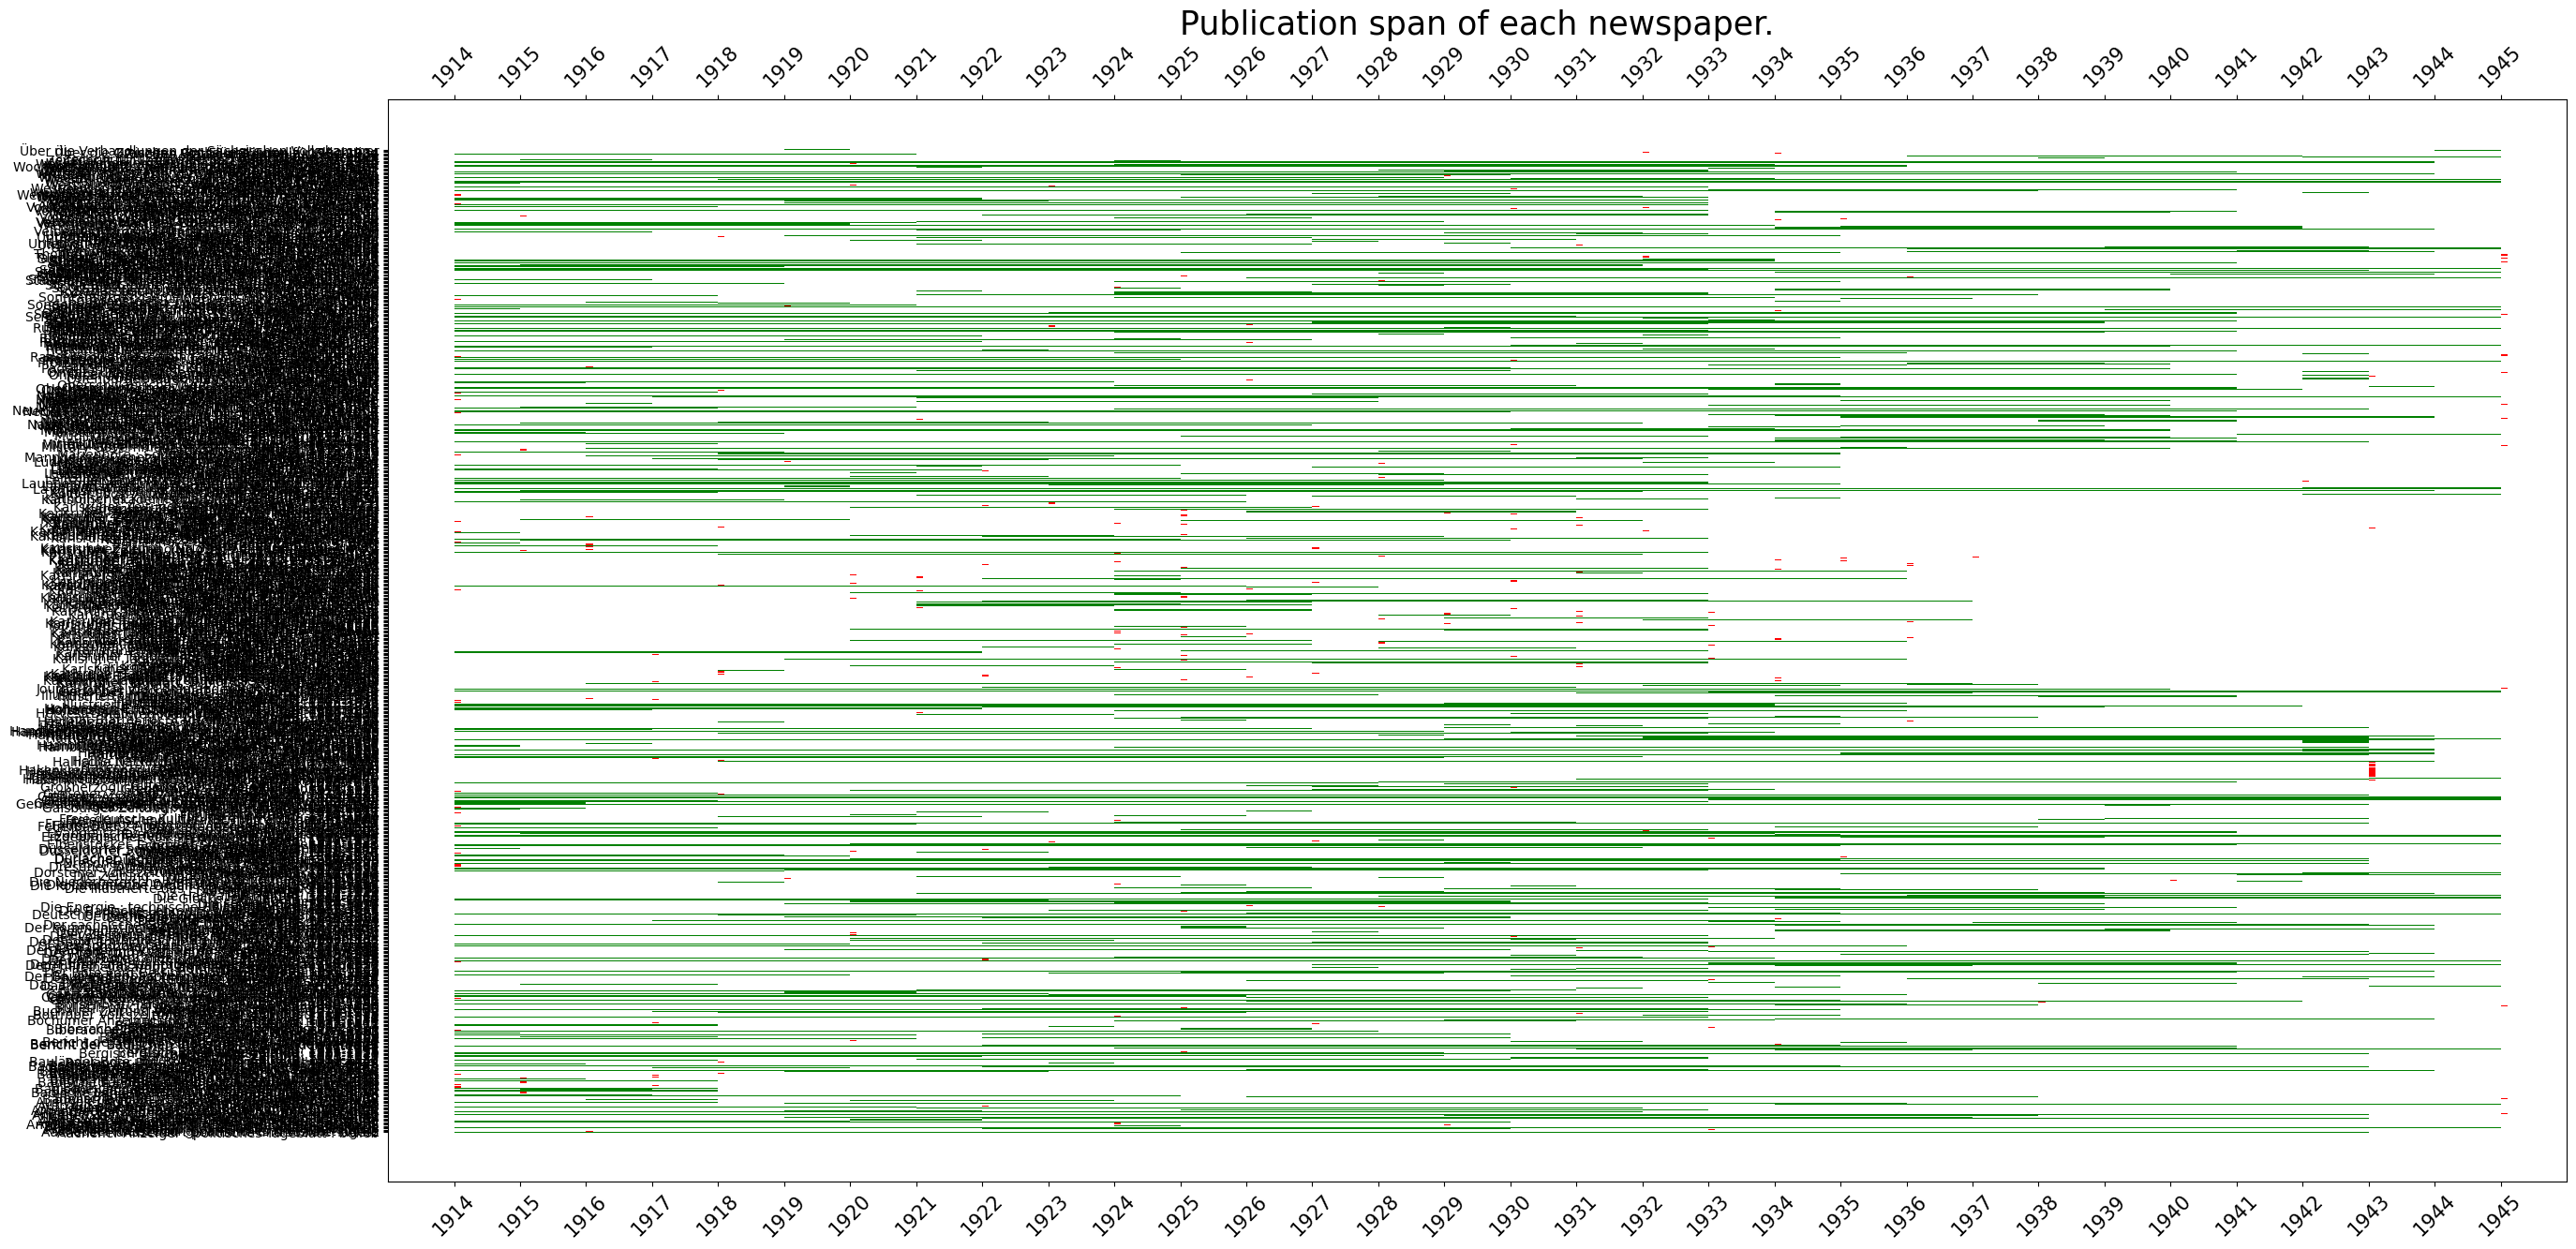

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

fig, ax= plt.subplots(figsize=(30, 15))
ax.set_title('Publication span of each newspaper.' ,fontsize=25)

for i, row in paper_publication_df.iterrows():
    bar_length= (row['publication_end'].year - row['publication_begin'].year)
    
    if bar_length>0:
        ax.barh(row['paper_title'][0:50], bar_length, color='g', left=row['publication_begin'].year)
    else:
        #the short red bars represent newspapers that were only published within a year. 
        ax.barh(row['paper_title'][0:50], 0.1, color='r', left=row['publication_begin'].year)
    
ax.set_xlim (1913, 1946)
ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
#ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xticks(ticks=np.arange(1914, 1946), rotation=45)
plt.rcParams['xtick.labelsize'] = 15


plt.show()

**Notes:**

1. Interestingly, the publication of a considerable amount of papers seems to have stopped in 1933.
2. Despite applying the function that extracted the first three tokens from the newspaper titles, there are still instances of the same newspaper with two different titles, one shorter and one longer. More cleaning has to be done on the titles. 